In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
df = pd.read_csv(data)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


**Data preparation**

+ Check if the missing values are presented in the features.
+ If there are missing values:
+ For caterogiral features, replace them with 'NA'
+ For numerical features, replace with with 0.0

In [3]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [6]:
df[categorical] = df[categorical].fillna("NA")
df[numerical] = df[numerical].fillna(0.0)

In [7]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

**Question 1**

What is the most frequent observation (mode) for the column industry?

In [8]:
df["industry"].mode()[0]

'retail'

**Question 2**

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

In [9]:
corr_df = round(df[numerical].corr(), 2)
corr_df

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.00,0.01,-0.02,-0.00
annual_income,0.01,1.00,0.03,0.02
interaction_count,-0.02,0.03,1.00,0.01
lead_score,-0.00,0.02,0.01,1.00


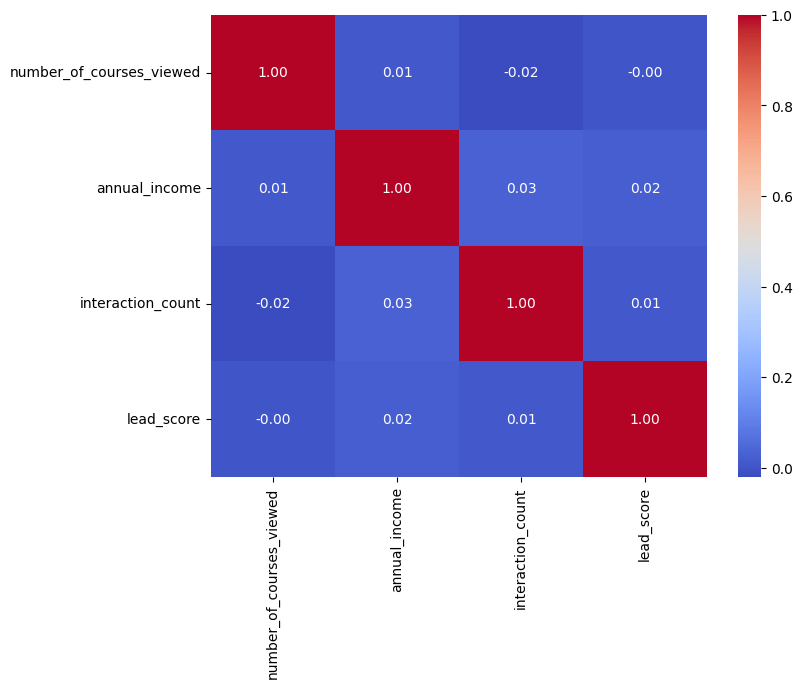

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

A2: annual_income and interaction_count (correlation=0.03)

**Split the data**

 + Split your data in train/val/test sets with 60%/20%/20% distribution.
 + Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
 + Make sure that the target value y is not in your dataframe.

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [12]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [13]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train["converted"]
del df_val["converted"]
del df_test["converted"]

**Question 3**

+ Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
+ Round the scores to 2 decimals using round(score, 2).
  
Which of these variables has the biggest mutual information score?

 + industry
 + location
 + lead_source
 + employment_status

In [14]:
def mi_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [15]:
mi = round(df_full_train[categorical].apply(mi_score), 2)
mi.sort_values(ascending=False)

lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

A3: lead_source          

**Question 4**

+ Now let's train a logistic regression.
+ Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
  * Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
+ model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
+ Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
  
What accuracy did you get?